In [1]:
import sys
!{sys.executable} -m pip install pycaret

  Using cached scikit_learn-0.23.2-cp38-cp38-win_amd64.whl (6.8 MB)
  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\acer\\anaconda3\\Lib\\site-packages\\~.mpy\\.libs\\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:
      Successfully uninstalled numpy-1.19.1


In [2]:
import pycaret

In [3]:
# Initiallize the data and fuctioning : Once initialize press 'Y'
from pycaret.classification import *

In [4]:
import numpy as np # linear algebra

In [5]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
data = pd.read_csv('Diabetes.csv')

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
clf1 = setup(data = data, target = 'Outcome')

,Description,Value
0,session_id,1929
1,Target,Outcome
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(768, 9)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
# Compare performance of the model through various regression model on various comparision metrics
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7785,0.8389,0.6041,0.7179,0.6491,0.4903,0.4985,1.6620
rf,Random Forest Classifier,0.7748,0.8340,0.5614,0.7384,0.6286,0.4723,0.4870,0.1780
lr,Logistic Regression,0.7692,0.8217,0.5673,0.7143,0.6203,0.4603,0.4726,1.0450
lda,Linear Discriminant Analysis,0.7692,0.8154,0.5509,0.7156,0.6073,0.4530,0.4668,0.0130
ridge,Ridge Classifier,0.7636,0.0000,0.5401,0.7085,0.5978,0.4397,0.4540,0.0140
xgboost,Extreme Gradient Boosting,0.7545,0.8040,0.6152,0.6543,0.6292,0.4471,0.4506,0.4110
lightgbm,Light Gradient Boosting Machine,0.7545,0.8134,0.6044,0.6598,0.6225,0.4431,0.4491,0.0540
ada,Ada Boost Classifier,0.7544,0.8022,0.5889,0.6699,0.6190,0.4402,0.4479,0.0730
et,Extra Trees Classifier,0.7543,0.8177,0.5450,0.6861,0.5922,0.4238,0.4362,0.1860
gbc,Gradient Boosting Classifier,0.7527,0.8248,0.6099,0.6648,0.6283,0.4447,0.4505,0.0890


In [13]:
# Check CatBoost Classifier model's performance on 10 kfold CV 
cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.7895,0.6316,0.6000,0.6154,0.3982,0.3985
1,0.8333,0.8526,0.6316,0.8571,0.7273,0.6112,0.6260
2,0.7407,0.7910,0.5263,0.6667,0.5882,0.4028,0.4088
3,0.6852,0.8060,0.6842,0.5417,0.6047,0.3489,0.3555
4,0.8889,0.9248,0.7895,0.8824,0.8333,0.7504,0.7530
5,0.7222,0.7546,0.3333,0.6667,0.4444,0.2857,0.3162
6,0.8148,0.8549,0.6111,0.7857,0.6875,0.5588,0.5677
7,0.8679,0.9365,0.7222,0.8667,0.7879,0.6931,0.6992
8,0.8491,0.9127,0.7222,0.8125,0.7647,0.6542,0.6566
9,0.6604,0.7667,0.3889,0.5000,0.4375,0.1997,0.2029


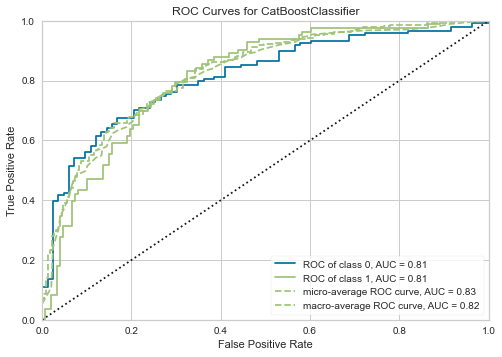

In [14]:
# Plot the model
plot_model(cb)

In [15]:
# ensembling CatBoost Classifier model (boosting)
cb_boosted = ensemble_model(cb, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6852,0.7684,0.5789,0.5500,0.5641,0.3180,0.3182
1,0.7778,0.8376,0.5789,0.7333,0.6471,0.4882,0.4954
2,0.7407,0.7970,0.6316,0.6316,0.6316,0.4316,0.4316
3,0.6667,0.8030,0.6316,0.5217,0.5714,0.3027,0.3064
4,0.8889,0.9158,0.8421,0.8421,0.8421,0.7564,0.7564
5,0.7407,0.7793,0.3889,0.7000,0.5000,0.3438,0.3708
6,0.7778,0.8395,0.6111,0.6875,0.6471,0.4857,0.4875
7,0.8868,0.9444,0.7222,0.9286,0.8125,0.7332,0.7451
8,0.8491,0.9111,0.7222,0.8125,0.7647,0.6542,0.6566
9,0.6792,0.7635,0.3889,0.5385,0.4516,0.2332,0.2394


In [17]:
# evaluate a model 
evaluate_model(cb_boosted)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [18]:
# generate predictions on holdout
cb_predictions_holdout = predict_model(cb_boosted)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7403,0.7972,0.5663,0.6620,0.6104,0.4174,0.4202


In [19]:
# finalize model
cb_final = finalize_model(cb_boosted)